# Importing libraries & data

In [1]:
# Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data

df = pd.read_csv(r"C:\Users\DavidVicente\Desktop\IronHack\Projects\Project 1\clean_df.csv")


## Checking data types

After checking the data type of each column, we have decided to change the data type of Year to int and Fatal to boolean

In [2]:
#Link: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

df["Year"] = df["Year"].astype("str").str.split(".").str[0]

# Hypothesis 1: Is surfing the more fatal than fishing and swimming?

## Setting the values from the columns

In [3]:
def column_check (x):
    
    print("TOTAL NUMBER OF ROWS: ",len(x),"\n")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
    print("NUMBER OF UNIQUE VALUES:",x.nunique(),"\n")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
    print("% OF NAN VALUES IS: ",round(100*(x.isnull().sum() / len(x)),2),"%\n")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
    print("VARIABLE WEIGHT WITHIN THE TOTAL OF THE COLUMN: \n \n",round((x.value_counts() / x.value_counts().sum())*100,2),"\n")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

In [4]:
df["Activity_2"] = df["Activity"].astype("str").str.split(" ").str[0]
df["Activity_2"] = df["Activity_2"].astype("str").str.split(",").str[0]

In [5]:
for i in range(len(df)):
    if df.loc[i, 'Activity_2'] == 'Spearfishing':
        df.loc[i, 'Activity_2'] = 'Fishing'


In [6]:
# Cleaning activity

top_activity_list = ["Swimming","Surfing","Fishing"]

for i in range(len(df)):
    if df.loc[i, 'Activity_2'] not in top_activity_list:
        df.loc[i, 'Activity_2'] = 'Other_activity'
        
# Also cleaning Fatal column

fatal_list = ["Y","N"]

for i in range(len(df)):
    if df.loc[i, 'Fatal'] not in fatal_list:
        df.loc[i, 'Fatal'] = "no_info"


## Creating an ad-hoc df for visualization

In [7]:
Activity = df[ (df['Activity_2'] == "Swimming") | (df['Activity_2'] == "Fishing") | (df['Activity_2'] == "Surfing") ]
Activity = Activity[ (Activity['Fatal'] == "Y") | (Activity['Fatal'] == "N") ]

In [8]:
Activity["new"] = Activity["Fatal"].apply(lambda x: 0 if x == "N" else 1)

In [9]:
Fatal_activity_percentage = pd.crosstab(Activity.Activity_2, Activity.Fatal).apply(lambda r: round(r/r.sum() * 100,2), axis=1)


In [10]:
Fatal_activity_2 = Activity.groupby(["Activity_2"])["Fatal"].count()


## Visualization

In this graph, we want to check the number of attacks per activity

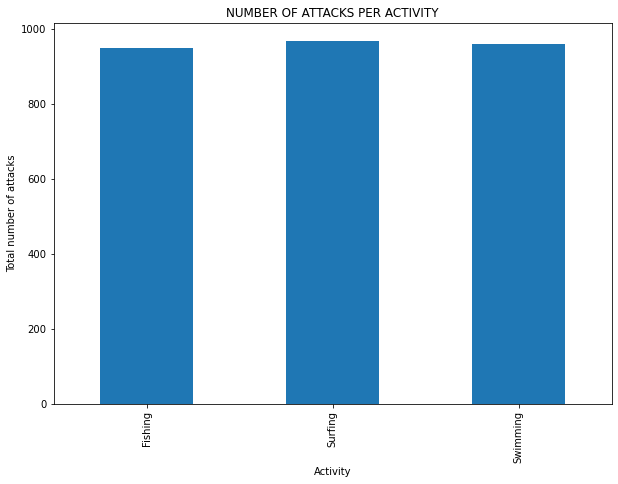

In [11]:
# Creating a bar plot

Fatal_activity_2.plot(kind="bar", stacked=True, figsize = (10,7), title= "NUMBER OF ATTACKS PER ACTIVITY", xlabel = "Activity",ylabel = "Total number of attacks"
 )

plt.show()


As we can see in the plot above, we have nearly the same shark attacks for the three activities

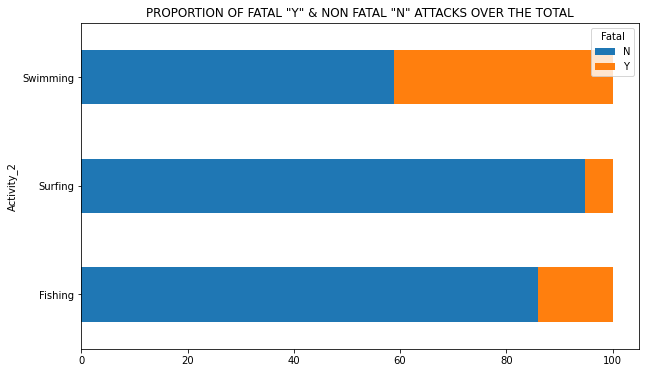

In [12]:
Fatal_activity_percentage.plot(kind="barh", stacked=True, figsize = (10,6), title='PROPORTION OF FATAL "Y" & NON FATAL "N" ATTACKS OVER THE TOTAL', legend=4)

plt.show()

On the other hand, as seen in this graph, an attack while swimming has way more probabilities to be fatal

# Hypothesis 2: Which is the most dangerous Q?

For this hypothesis, we will need to create a new column that groups the month of the attack into a Q

## Creating new column "Q"

To do so, we have to create a dictionary with the Q to apply to each month

In [13]:
#Creating dictionary

q_dict = {"Jan":"Q1","Feb":"Q1","Mar":"Q1","Apr":"Q2","May":"Q2","Jun":"Q2","Jul":"Q3","Aug":"Q3","Sep":"Q3","Oct":"Q4","Nov":"Q4","Dec":"Q4","month_not_found":"Q_not_found"}

'''
for i in range(len(df)):
    if df.loc[i, 'month'] in q_dict:
        df.loc[i, 'Q'] = q_dict.values()

df["Q"]

#print(q_dict.values())
'''

df["Q"] = df["month"].apply(lambda x: q_dict[x] )


Creating specific dataframe with informed values

In [14]:
# Filtering 

#df_q = df[ (df['Q'] == "Q1") | (df['Q'] == "Q2") | (df['Q'] == "Q3") | (df['Q'] == "Q4") &]

df_q = df[(df["Q"] != "Q_not_found" ) & (df["Fatal"] != "no_info") ]

df_q[["Q","Activity_2"]].shape


(4898, 2)

In [15]:
Q_fatal_percentage = pd.crosstab(df_q.Q, df_q.Fatal).apply(lambda r: round(r/r.sum() * 100,2), axis=1)


## Visualization

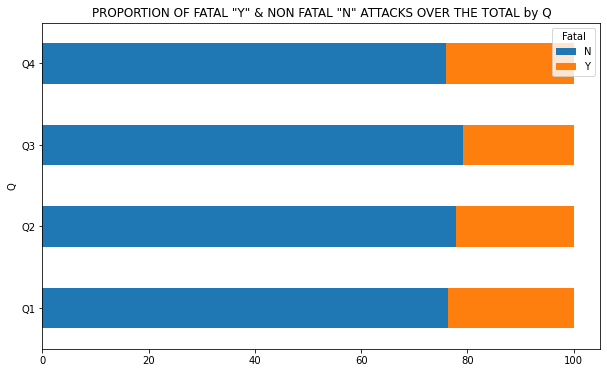

In [16]:
Q_fatal_percentage.plot(kind="barh", stacked=True, figsize = (10,6), title='PROPORTION OF FATAL "Y" & NON FATAL "N" ATTACKS OVER THE TOTAL by Q', legend=4)
plt.show()

In [17]:
Q_fatal_2 = pd.crosstab(df_q.Q, df_q.Fatal).agg("sum")


In [18]:
Q_fatal_25 = df_q.groupby("Q")["Fatal"].count()


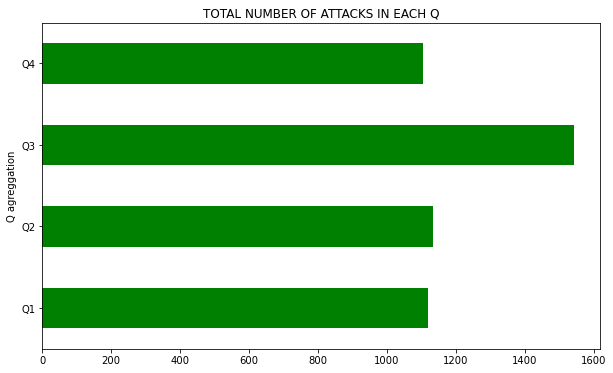

In [20]:
Q_fatal_25.plot(kind="barh", stacked=True, figsize = (10,6), title='TOTAL NUMBER OF ATTACKS IN EACH Q', sort_columns=False,color="green", xlabel = "Q agreggation", ylabel = "Total number of attacks")


plt.show()

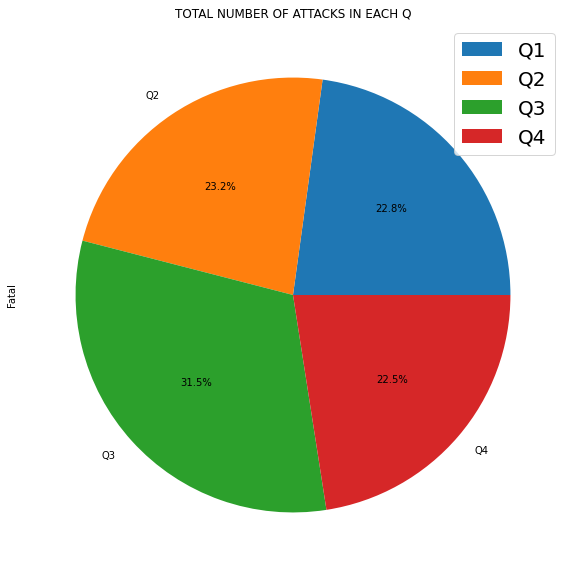

In [21]:
# https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/


Q_fatal_25.plot(kind="pie", stacked=True, figsize = (15,10), title='TOTAL NUMBER OF ATTACKS IN EACH Q', sort_columns=False, autopct='%.1f%%')

plt.legend(prop={'size': 20})


plt.show()

# Hypothesis 3: Is Surfing in Australia more dangerous than in USA?

## Creating a new df with "Surfers from AUSTRALIA & USA"

In [22]:

surfing_aus_usa = df[((df["Country"] == "USA") | (df["Country"] == "AUSTRALIA")) & ((df["Q"] != "Q_not_found" ) & (df["Fatal"] != "no_info")) & (df["Activity_2"] == "Surfing") ]


We only have 733 rows! Probably not enough sample :( 

## Visualization

In [23]:
# link: https://realpython.com/pandas-groupby/

# EXAMPLE: df.groupby(["state", "gender"], as_index=False)["last_name"].count()

surfing_groupby = surfing_aus_usa.groupby(["Country"])["Fatal"].count()


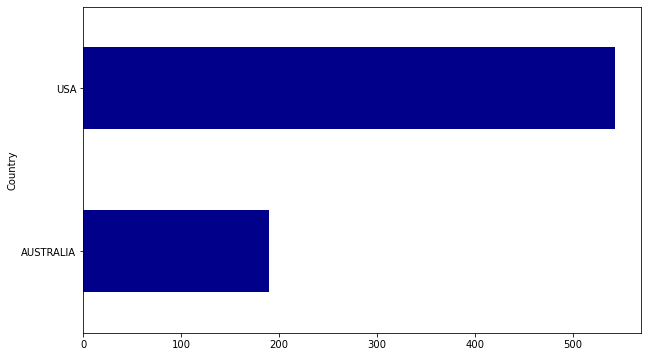

In [24]:
surfing_groupby.plot(kind="barh", color="darkblue", figsize = (10,6))

plt.show()

In [25]:
fatal_surfing = surfing_aus_usa[surfing_aus_usa["Fatal"] == "Y"]

We can't take a look at the fatal attacks since we just have 21 cases, so we will stick with attacks in general 